In [5]:
import numpy as np
import numba
import random
import matplotlib.pyplot as plt
import scipy.integrate

import seaborn as sns
sns.set(font_scale = 1.5, rc={"lines.linewidth":2})

# Midterm 2

# Problem 1 - Nullcines (6 pts.)

Below we consider the system of equations for two genes $a$ and $b$ which activate each other:

\begin{aligned}
&\dot{a}=\frac{\beta_a}{\left(\frac{k_b}{b}\right)^n+1}-\gamma_a a \\[1em]
&\dot{b}=\frac{\beta_b}{\left(\frac{k_a}{a}\right)^n+1}-\gamma_b b
\end{aligned}

## Part a (+1)

Explain why plotting the nullclines and finding where they cross corresponds to the fixed points of the system.

<font color='blue'> Nullclines are defined as when our differential equations equal zero. So when our nullclines cross, this means that **both** differential equations evaluate to zero, corresponding to a fixed point of the system. </font> 

## Part b (+2)

Using the parameters and values provided below, plot the nulleclines for when $n=1$ and when $n=2$.

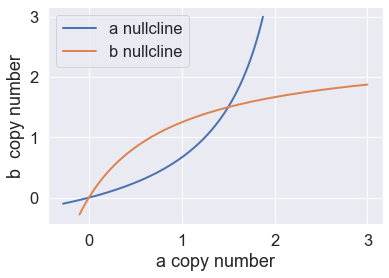

In [9]:
# parameters
gamma_a = gamma_b = 4 # per min
beta_a = beta_b = 10 # per min 
k_a = k_b = 1 # copy number
n=1

# values of a and b to plot over
a = np.linspace(-0.1, 3, 100)
b = np.linspace(-0.1, 3, 100)

# define nullclines
null_a = beta_a / ( ((k_b/b)**n + 1) * gamma_a)
null_b = beta_b / ( ((k_a/a)**n + 1) * gamma_b )

# plot nullclines and label
plt.plot(null_a, b)
plt.plot(a, null_b)
plt.xlabel('a copy number')
plt.ylabel('b  copy number')
plt.legend(['a nullcline','b nullcline'])

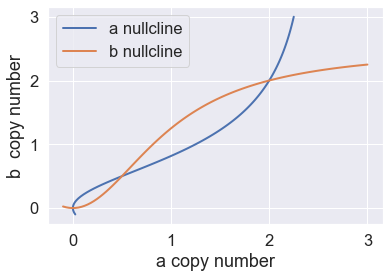

In [10]:
# parameters
gamma_a = gamma_b = 4 # per min
beta_a = beta_b = 10 # per min 
k_a = k_b = 1 # copy number
n=2

# values of a and b to plot over
a = np.linspace(-0.1, 3, 100)
b = np.linspace(-0.1, 3, 100)

# define nullclines
null_a = beta_a / ( ((k_b/b)**n + 1) * gamma_a)
null_b = beta_b / ( ((k_a/a)**n + 1) * gamma_b)

# plot nullclines and label
plt.plot(null_a, b)
plt.plot(a, null_b)
plt.xlabel('a copy number')
plt.ylabel('b  copy number')
plt.legend(['a nullcline','b nullcline'])

## part c (+1)

How did the number of fixed points change as you changed the value of $n$?

<font color='blue'> We see that the number of fixed points increase as we changed $n$. There were two fixed points when $n$ was 1, and three fixed points when $n$ was 2. </font>

## part d (+2)

Which bifurcation diagram below (1 or 2) better describes the behavior of the fixed points you've seen? Why? (Note I only plot for $n > 1$ since that is the lowest value that is biologically meaningful here.)

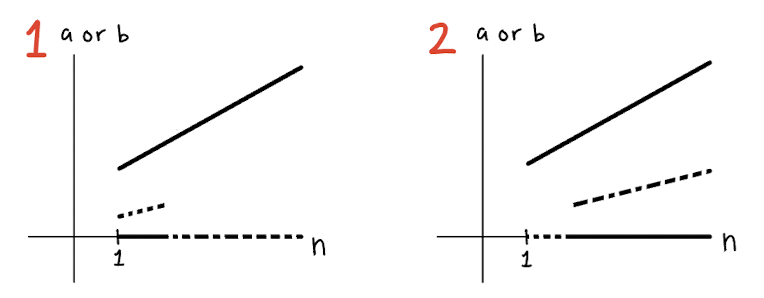


<font color='blue'> Diagram 2 matches better. We see that this diagram depicts an increase in the number for fixed points as we increase the value of $n$. Initially, there are only two fixed points, but a higher value of $n$ corresponds to three fixed points. </font>

# Problem 2 - Gillespie simulation for gene expression modified (7 pts.)

We previously used the following set of differential equations to keep track of the number of mRNAs and protein.

$$ \frac{\mathrm{d}m}{\mathrm{d}t} = \beta_m - \gamma_m m,$$

$$ \frac{\mathrm{d}p}{\mathrm{d}t} = \beta_p m - \gamma_p p$$

And using a Gillespie simulation approach, we specified the propensities as:

\begin{align}
\begin{array}{ll}
\text{reaction, }r_i & \text{propensity, } a_i \\
m \rightarrow m+1,\;\;\;\; & \beta_m \\[0.3em]
m \rightarrow m-1, \;\;\;\; & \gamma_m m\\[0.3em]
p \rightarrow p+1, \;\;\;\; & \beta_p m \\[0.3em]
p \rightarrow p-1, \;\;\;\; & \gamma_p p.
\end{array}
\end{align}

Let's change then differential equations slightly, as shown below. **We will use this version of the equations throughout this question.**

$$ \frac{\mathrm{d}m}{\mathrm{d}t} = \beta_m \frac{p}{1+p}  - \gamma_m m,$$

$$ \frac{\mathrm{d}p}{\mathrm{d}t} = \beta_p m - \gamma_p p$$

## Part a (+1)

Explain the biological meaning of the changes made to the system of equations. How does the number of mRNAs influence the production of protein? How does the number of proteins influence the production of protein? 

<font color='blue'> The production of mRNA is now dependent on the amount of protein, where an increase in protein concentration increases the rate of production. The rate of production is bounded by 0 (at low protein concentration) and $\beta_m$ (at high protein concentration). </font>

## Part b (+1)

Which of the four reaction's propensities should change as a result of the changes in the differential equations?

<font color='blue'> The $m \rightarrow m+1$ propensity should change.  </font>

## Part c (+2)

Modify the Gillespie simulation code below to change the reaction propensities accordingly. 

In [23]:
# specifying the parameters
beta_m = beta_p = 10 # per min
gamma_m = gamma_p = 1 # per min, per transcript

# how long we want run simulation for
total_time = 20 # mins

def gillespie():
    
    # initializing the number of mRNAs and the time
    m = [1]
    p = [1]
    t = [0]

    while t[-1] < total_time:

        # specify the propensities for the possible state change
        m_production_rate = beta_m * p[-1] / (1 + p[-1]) ## ONLY LINE THAT CHANGES
        m_degradation_rate = m[-1] * gamma_m
        p_production_rate = beta_p * m[-1]
        p_degradation_rate = p[-1] * gamma_p

        # add up all the propensities
        total_prop = m_production_rate + m_degradation_rate + p_production_rate + p_degradation_rate

        # determine how much time elapses before "something+ happens
        time_elapsed = np.random.exponential(1/total_prop)

        # update time array 
        t.append(t[-1] + time_elapsed)

        # randomly choose which event happens
        event = random.choices(["m production", "m degradation", "p production", "p degradation"], 
                               weights=(m_production_rate, m_degradation_rate,
                                        p_production_rate, p_degradation_rate,))[0]

        # update mRNA list based on which event happend
        if event == "m production":
            m.append(m[-1]+1)
            p.append(p[-1])

        if event == "m degradation":
            m.append(m[-1]-1)
            p.append(p[-1])

        if event == "p production":
            p.append(p[-1]+1)
            m.append(m[-1])

        if event == "p degradation":
            p.append(p[-1]-1)
            m.append(m[-1])
            
    return t, m, p

Below I plot the results of the Gillespie simulation run 10 times so you can see the "typical behavior".

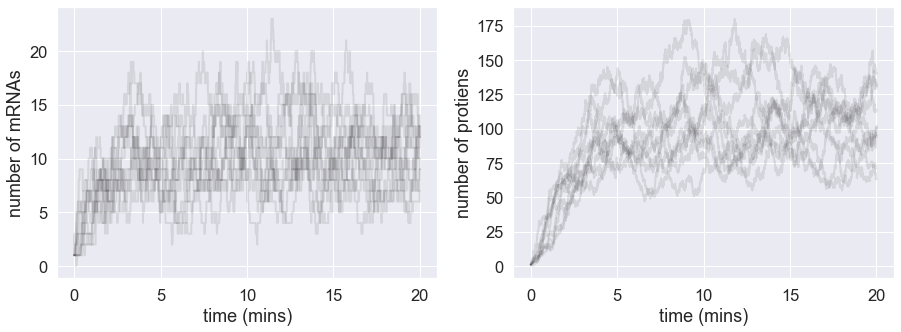

In [24]:
fig, ax = plt.subplots(1, 2, figsize=(15,5), sharex=True)

for i in range(10):
    t, m, p = gillespie()
    
    ax[0].plot(t, m, color="k", alpha=0.1)
    ax[1].plot(t, p, color="k", alpha=0.1)
    
ax[0].set_xlabel("time (mins)")
ax[0].set_ylabel("number of mRNAs")

ax[1].set_xlabel("time (mins)")
ax[1].set_ylabel("number of protiens");

## Part d (+3)

From your plotted results, what are the steady state (i.e. fixed point) values of the mRNAs and proteins? What impact did the change in the differential equation have on the steady state values?

<font color='blue'> Steady state of mRNA is around 10, while the steady state of protein is around 100. The steady state of protein *did* decease from what we saw in the homework, but mostly as a result of me having changed the parameters values. In actuality, the change in the propensities only modestly changes the steady states (from 10 and 100 to 9.9 and 99), but not in any visibly detectable way. </font>

# Problem 3 - Diffusion with flow by Master Equation (7 pts.)

Let's say we want to model diffusion in the presence of some flow. As a simplification, we can model this as a given particle is **twice as likely to "jump" to the right as it is to "jump" to the left** at each time point. There will still be randomness in how the particles move, but there is an overall preference to move to the right given the flow. 

Let's specify all the parameters and initialize all the probability to be in the center, as shown below:

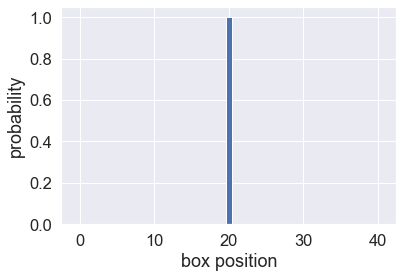

In [13]:
# number of boxes
n_boxes = 41

# time increment (Delta t) in seconds
dt = 0.1

# number of steps
n_steps = 100

# hopping rate constant (k) in sec^-1
k = 1

# initialize the probability distribution
p = np.zeros([n_boxes, n_steps])

# find the middle box
n_center = int(n_boxes / 2)

# set the middle box to have probability 1 at the initial time step 
p[n_center, 0] = 1

# show initial proability
plt.bar(np.arange(n_boxes), p[:,0])
plt.xlabel("box position")
plt.ylabel("probability");

## part a (+1)

Before coding anything, explain what you expect to see happen to the probability distribution over time under this model of diffusion with flow.

<font color='blue'> I expect to see the probability distribution spread out over time, but with a bias to the right. That is, I expect to see more of the probability on the right-half side of the plot. </font>

## part b (+4)

Modify the code for the numerical integration to include the modification that particles should be twice as likely to jump to the right as to the left.

There are a total of **four** terms that should be modified below. Make those changes.

As a reminder, here is the Master Equation for the interior:

$$
\overbrace{p(n, t+\Delta t)}^{\text {new probability }}=\underbrace{p(n, t)}_{\text {old probability }}+\overbrace{k \Delta t p(n-1, t)}^{\text {particles moving in from left }}+\underbrace{k \Delta t p(n+1, t)}_{\text {particles moving in from right }}-\overbrace{2 k \Delta t p(n, t)}^{\text {particles leaving to left or right }} .
$$

And the here are the Master Equations would be for the 0th and -1 boxes, keeping in mind that particles :

$$
\overbrace{p(0, t+\Delta t)}^{\text {new probability }}=\underbrace{p(0, t)}_{\text {old probability }} + \overbrace{k \Delta t p(1, t)}_{\text {particles moving in from right }}-\underbrace{k \Delta t p(0, t)}^{\text {particles leaving to the right }} 
$$

$$
\overbrace{p(-1, t+\Delta t)}^{\text {new probability }}=\underbrace{p(-1, t)}_{\text {old probability }} + \overbrace{k \Delta t p(-2, t)}_{\text {particles moving in from left }}-\underbrace{k \Delta t p(-1, t)}^{\text {particles leaving to the left }} 
$$

In [14]:
# loop through the number of steps
for t in range(1, n_steps):
    
    # update probability array in the interior region
    for b in range(1,n_boxes-1):
        p[b,t] = p[b,t-1] + 2*k*dt*p[b-1,t-1] + k*dt*p[b+1,t-1] - 4*k*dt*p[b,t-1]

    # update probability array for the left-most box
    p[0,t] = p[0,t-1] + k*dt*p[1,t-1] - 2*k*dt*p[0,t-1]
    
    # update probability array for the right-most box
    p[-1,t] = p[-1,t-1] + 2*k*dt*p[-2,t-1] - k*dt*p[-1,t-1]

Now I plot the results at time 0, 49, and 99:

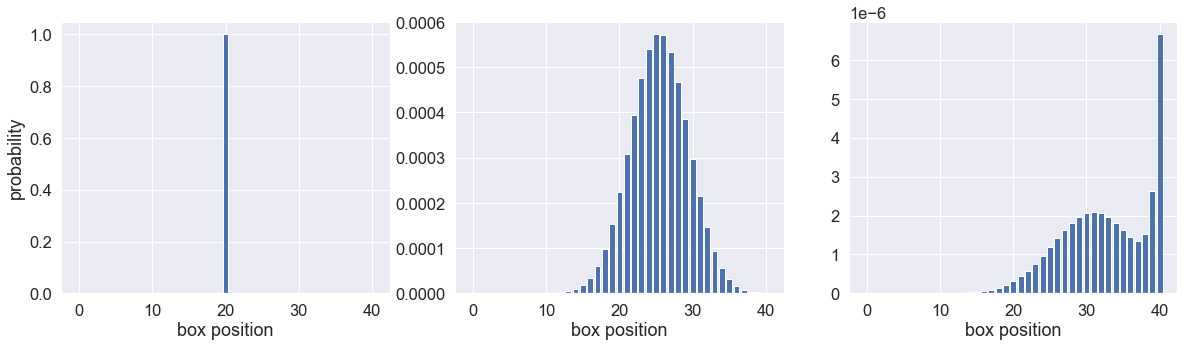

In [15]:
fig, ax = plt.subplots(1, 3, figsize=(20,5))

ax[0].bar(np.arange(n_boxes), p[:,0])
ax[0].set_xlabel("box position")
ax[0].set_ylabel("probability");

ax[1].bar(np.arange(n_boxes), p[:,49])
ax[1].set_xlabel("box position")

ax[2].bar(np.arange(n_boxes), p[:,99])
ax[2].set_xlabel("box position");

## part c (+2)

Do the plotted results match what you expected? Why or why not? You can still answer this even if you didn't do part b correctly!

<font color='blue'> Our results do match the expectation, where the probability has spread out, while moving right-ward. Additionally, we see that we are starting to hit the boundary, with probability "scrunching" up on the right-most box.  </font>

## Alternate Problem 3.

Same problem, but encoding flow **to the left**.

In [16]:
# loop through the number of steps
for t in range(1, n_steps):
    
    # update probability array in the interior region
    for b in range(1,n_boxes-1):
        p[b,t] = p[b,t-1] + k*dt*p[b-1,t-1] + 2*k*dt*p[b+1,t-1] - 3*k*dt*p[b,t-1]

    # update probability array for the left-most box
    p[0,t] = p[0,t-1] + 2*k*dt*p[1,t-1] - k*dt*p[0,t-1]
    
    # update probability array for the right-most box
    p[-1,t] = p[-1,t-1] + k*dt*p[-2,t-1] - 2*k*dt*p[-1,t-1]

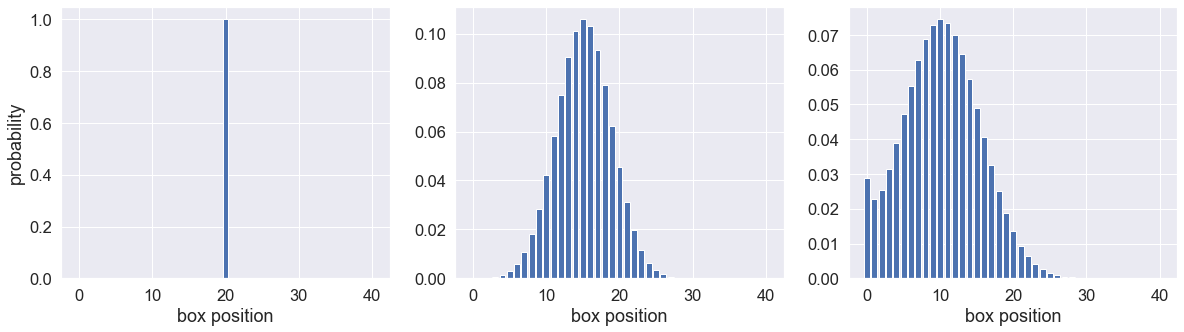

In [17]:
fig, ax = plt.subplots(1, 3, figsize=(20,5))

ax[0].bar(np.arange(n_boxes), p[:,0])
ax[0].set_xlabel("box position")
ax[0].set_ylabel("probability");

ax[1].bar(np.arange(n_boxes), p[:,49])
ax[1].set_xlabel("box position")

ax[2].bar(np.arange(n_boxes), p[:,99])
ax[2].set_xlabel("box position");

In [25]:
# loop through the number of steps
for t in range(1, n_steps):
    
    # update probability array in the interior region
    for b in range(1,n_boxes-1):
        p[b,t] = p[b,t-1] + k*dt*p[b-1,t-1] + k*dt*p[b+1,t-1] - 2*k*dt*p[b,t-1]

    # update probability array for the left-most box
    p[0,t] = p[0,t-1] + k*dt*p[1,t-1] - k*dt*p[0,t-1]
    
    # update probability array for the right-most box
    p[-1,t] = p[-1,t-1] + k*dt*p[-2,t-1] - k*dt*p[-1,t-1]

TypeError: list indices must be integers or slices, not tuple

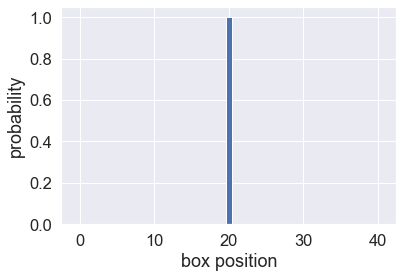

In [19]:
# number of boxes
n_boxes = 41

# time increment (Delta t) in seconds
dt = 0.1

# number of steps
n_steps = 100

# hopping rate constant (k) in sec^-1
k = 1

# initialize the probability distribution
p = np.zeros([n_boxes, n_steps])

# find the middle box
n_center = int(n_boxes / 2)

# set the middle box to have probability 1 at the initial time step 
p[n_center, 0] = 1

# show initial proability
plt.bar(np.arange(n_boxes), p[:,0])
plt.xlabel("box position")
plt.ylabel("probability");